**Logistic Regression**

1.Load the data and libraries
2.Data prepartion and preprocessing
3.Data Visulization
4.Data analysis
          1.Uni-variate
          2.Bi-variate
          3.Multi_variate
              &Supervised
                   Classification Y is discrete(0/1)
                   Regression:Y is continuous
              &Unsupervised

Load the data and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Load the data

In [ ]:
train=pd.read_csv('/content/train_ctrUa4K (4).csv')
test=pd.read_csv('/content/test_lAUu6dG (4).csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Exploratory Data analysis

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train.skew()

<ipython-input-7-1d3a3c99b9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

Univariate Analysis

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

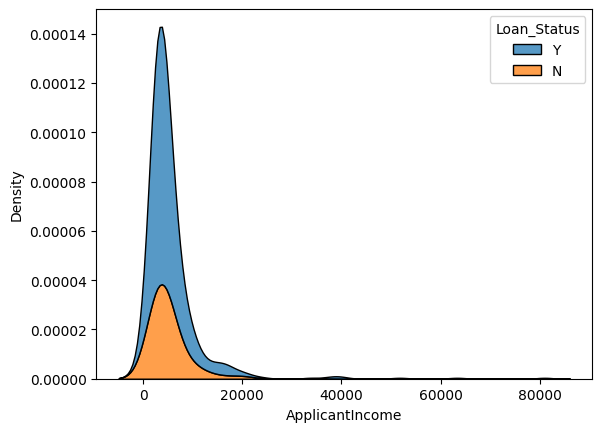

In [ ]:
sns.kdeplot(data=train, x="ApplicantIncome", hue="Loan_Status", multiple="stack")

<Axes: xlabel='LoanAmount', ylabel='Density'>

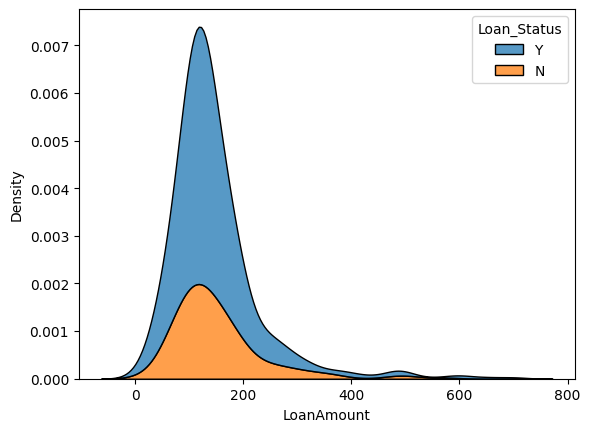

In [ ]:
sns.kdeplot(data=train, x="LoanAmount", hue="Loan_Status", multiple="stack")

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

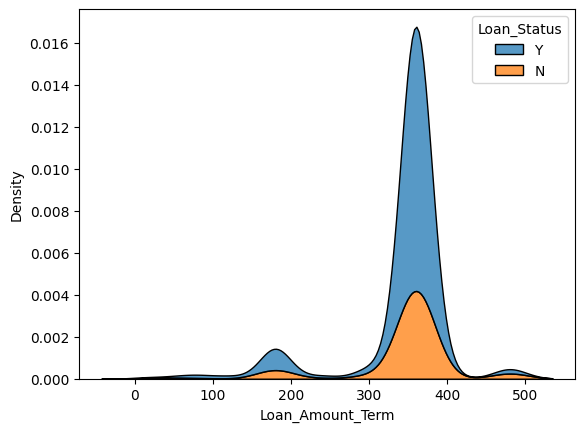

In [ ]:
sns.kdeplot(data=train, x="Loan_Amount_Term", hue="Loan_Status", multiple="stack")

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

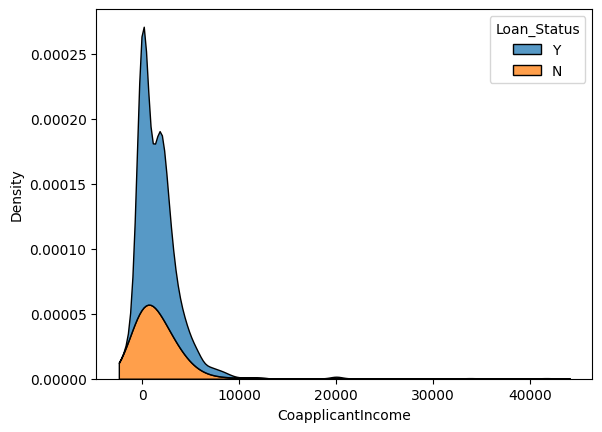

In [ ]:
sns.kdeplot(data=train, x="CoapplicantIncome", hue="Loan_Status", multiple="stack")

<Axes: ylabel='Loan_Status'>

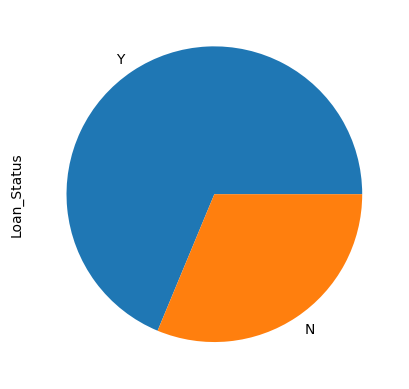

In [ ]:
train['Loan_Status'].value_counts().plot(kind='pie')

<Axes: >

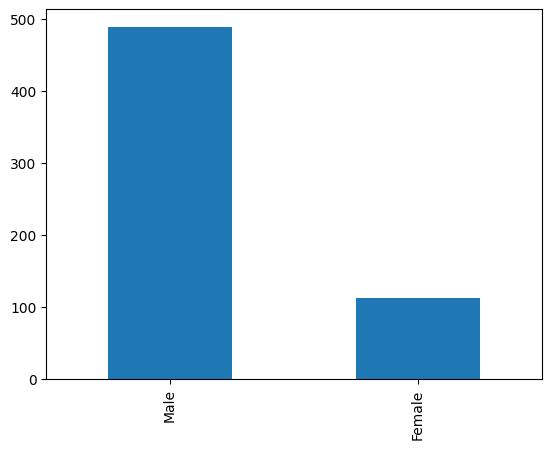

In [ ]:
train['Gender'].value_counts().plot(kind='bar')

<Axes: >

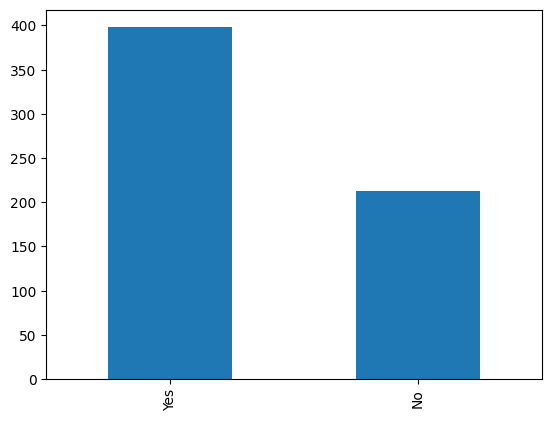

In [ ]:
train['Married'].value_counts().plot(kind='bar')

<Axes: >

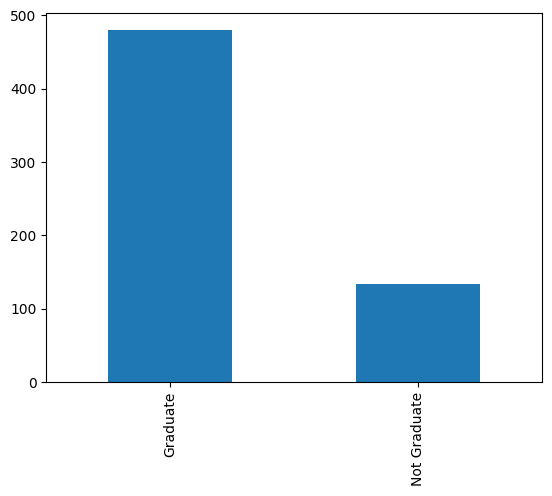

In [ ]:
train['Education'].value_counts().plot(kind='bar')

<Axes: >

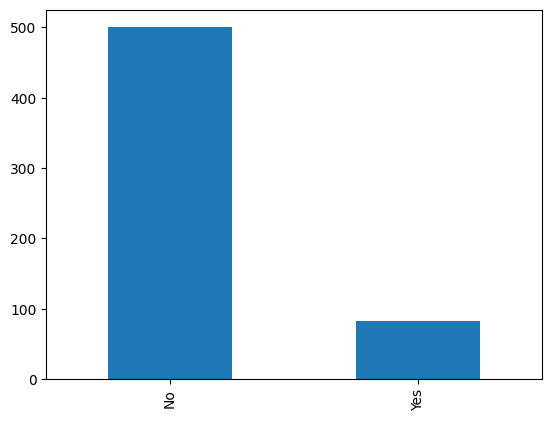

In [ ]:
train['Self_Employed'].value_counts().plot(kind='bar')

Bivariate Analysis

Correlation

<ipython-input-17-8ae1bc75c7f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

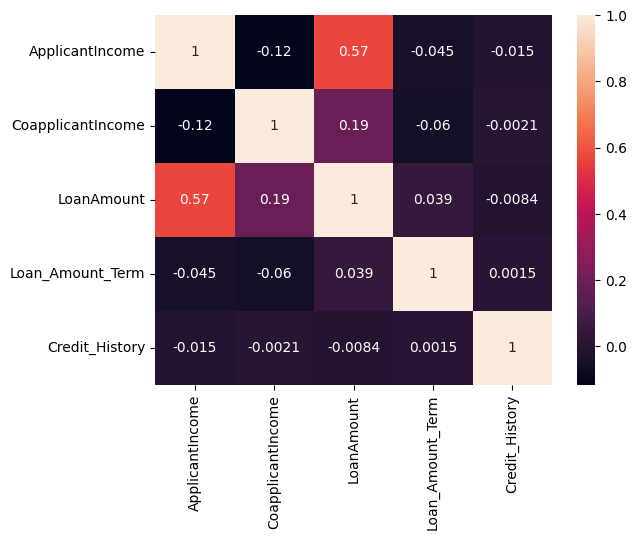

In [ ]:
sns.heatmap(train.corr(),annot=True)

Chi square test

In [ ]:
from scipy.stats import chi2_contingency
def chi2_sq_test(var1, var2):
  """Check for Categorical Variable Relationship"""
  table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(table)
  if p <= 0.05:
    print('Accept the Alternate Hypothesis', round(p,2))
  else:
    print('Failed to reject the null Hypothesis', round(p,2))
  return table



Null Hypothesis:Gender and Loan Status are independent of each other
Alternate Hypothesis:Gender and Loan Status are dependent of each other

In [ ]:
pd.crosstab(train['Gender'],train['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
chi2_sq_test(train['Gender'],train['Loan_Status'])

Failed to reject the null Hypothesis 0.71


Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
chi2_sq_test(train['Married'],train['Loan_Status'])

Accept the Alternate Hypothesis 0.03


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [ ]:
chi2_sq_test(train['Education'],train['Loan_Status'])

Accept the Alternate Hypothesis 0.04


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [ ]:
chi2_sq_test(train['Self_Employed'],train['Loan_Status'])

Failed to reject the null Hypothesis 1.0


Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [ ]:
chi2_sq_test(train['Credit_History'],train['Loan_Status'])

Accept the Alternate Hypothesis 0.0


Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [ ]:
chi2_sq_test(train['Property_Area'],train['Loan_Status'])

Accept the Alternate Hypothesis 0.0


Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [ ]:
chi2_sq_test(train['Dependents'],train['Loan_Status'])

Failed to reject the null Hypothesis 0.37


Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


Data Preparation

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
def data_prep(data):
  #Imputation of missing values
  data['Gender'] =np.where(data['Gender'].isna(),data['Gender'].mode(dropna=True)[0],data['Gender'])
  data['Married'] =np.where(data['Married'].isna(),data['Married'].mode(dropna=True)[0],data['Married'])
  data['Dependents'] =np.where(data['Dependents'].isna(),data['Dependents'].mode(dropna=True)[0],data['Dependents'])
  data['Dependents'].replace('3+',3, inplace = True)
  data['Self_Employed'] =np.where(data['Self_Employed'].isna(),data['Self_Employed'].mode(dropna=True)[0],data['Self_Employed'])
  data['LoanAmount'] = np.where(data['LoanAmount'].isna(),
                                 data['LoanAmount'].median(skipna=True),data['LoanAmount'])
  data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term'].isna(),
                                 data['Loan_Amount_Term'].median(skipna=True),data['Loan_Amount_Term'])
  data['Credit_History'] =np.where(data['Credit_History'].isna(),data['Credit_History'].mode(dropna=True)[0],data['Credit_History'])
  data['Credit_History']=data['Credit_History'].astype('int')
  data['Dependents']=data['Dependents'].astype('int')
  return(data)

In [ ]:
data_prep(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


Encode the discrete variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i]=le.fit_transform(data[i])
  return(data)


In [ ]:
encode(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 62.5 KB


In [ ]:
x=train.drop(['Loan_ID','Loan_Status'],axis=1)
y=train['Loan_Status']

In [ ]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Train test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


Apply Multivariate Model

In [ ]:
logreg=LogisticRegression()
#fit the model
logreg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
logreg.coef_

array([[ 6.26281359e-02,  4.17076622e-01, -9.45258072e-02,
        -4.15246638e-01, -1.46677090e-01, -1.41674766e-05,
        -3.84079290e-05, -5.50042888e-04, -5.04706935e-03,
         2.93027512e+00,  6.02247019e-02]])

In [ ]:
logreg.intercept_

array([0.15680039])

Probability outcome of the model

In [ ]:
proba_train=logreg.predict_proba(x_train)
proba_train

array([[0.23013761, 0.76986239],
       [0.24879764, 0.75120236],
       [0.19489219, 0.80510781],
       [0.28187963, 0.71812037],
       [0.82532771, 0.17467229],
       [0.35873697, 0.64126303],
       [0.16331826, 0.83668174],
       [0.27134771, 0.72865229],
       [0.20375317, 0.79624683],
       [0.85047303, 0.14952697],
       [0.18355825, 0.81644175],
       [0.21176423, 0.78823577],
       [0.25521841, 0.74478159],
       [0.85161945, 0.14838055],
       [0.27220591, 0.72779409],
       [0.21971569, 0.78028431],
       [0.17865274, 0.82134726],
       [0.17355012, 0.82644988],
       [0.16915521, 0.83084479],
       [0.21458646, 0.78541354],
       [0.17796859, 0.82203141],
       [0.23620395, 0.76379605],
       [0.25256156, 0.74743844],
       [0.80091623, 0.19908377],
       [0.75270908, 0.24729092],
       [0.21975381, 0.78024619],
       [0.21480025, 0.78519975],
       [0.84758733, 0.15241267],
       [0.25985822, 0.74014178],
       [0.1674259 , 0.8325741 ],
       [0.

In [ ]:
y_hat_train=logreg.predict(x_train)
y_hat_test=logreg.predict(x_test)

In [ ]:
y_hat_train


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
y_train

579    1
199    0
266    1
309    1
589    0
      ..
98     1
322    1
382    1
365    0
510    0
Name: Loan_Status, Length: 491, dtype: int64

Model evaluation

In [ ]:
conf_matrix_train=confusion_matrix(y_train,y_hat_train)
conf_matrix_train

array([[ 65,  85],
       [  5, 336]])

In [ ]:
conf_matrix_test=confusion_matrix(y_test,y_hat_test)
conf_matrix_test

array([[17, 25],
       [ 2, 79]])

In [ ]:
print("Accuracy score for the train model is",accuracy_score(y_train,y_hat_train))

Accuracy score for the train model is 0.8167006109979633


In [ ]:
print("Accuracy score for the test model is",accuracy_score(y_test,y_hat_test))

Accuracy score for the test model is 0.7804878048780488


In [ ]:
print(classification_report(y_train,y_hat_train))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491



In [ ]:
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
#fit the model
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_test,y_hat_test_dtree)

The accuracy of the model is 0.72
[[26 16]
 [19 62]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        42
           1       0.79      0.77      0.78        81

    accuracy                           0.72       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123



In [ ]:
model_eval(y_train,y_hat_train_dtree)

The accuracy of the model is 1.0
[[150   0]
 [  0 341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       341

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



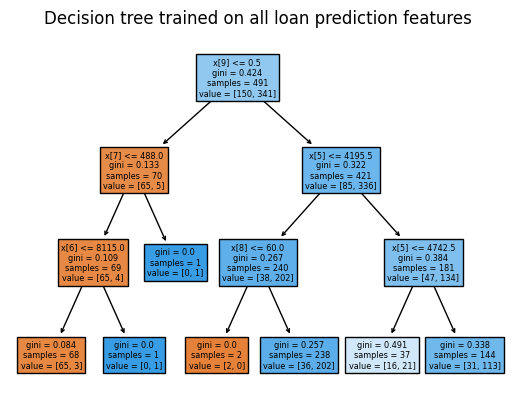

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
clf = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

In [ ]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
Credit_History,0.304236
ApplicantIncome,0.247587
LoanAmount,0.141142
CoapplicantIncome,0.111992
Loan_Amount_Term,0.045526
Dependents,0.043192
Married,0.031259
Property_Area,0.023751
Self_Employed,0.021754
Gender,0.020958
